### Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Global Variables

In [88]:
bins=np.array([40, 50,60,70,80,90,100])

### Importing Data

In [89]:
bse_fa21 = pd.read_csv('assets/bse_fa21.csv', index_col=0)

bse_fa22 = pd.read_csv('assets/bse_fa22.csv', index_col=0)

bcs_sp22 = pd.read_csv('assets/bcs_sp22.csv', index_col=0)

bcs_fa21 = pd.read_csv('assets/bcs_fa21.csv', index_col=0)


### Data Cleaning

In [90]:
bcs_fa21 = bcs_fa21[bcs_fa21['TOTAL'] >= 40]
bcs_fa21['QUIZ'] = (bcs_fa21['QUIZ'] / 15) * 100
bcs_fa21['ASSIGN'] = (bcs_fa21['ASSIGN'] / 10) * 100
bcs_fa21['MID'] = (bcs_fa21['MID'] / 25) * 100
bcs_fa21['FINAL'] = (bcs_fa21['FINAL'] / 50) * 100

bcs_sp22 = bcs_sp22[bcs_sp22['TOTAL'] >= 40]
bcs_sp22['QUIZ'] = (bcs_sp22['QUIZ'] / 15) * 100
bcs_sp22['ASSIGN'] = (bcs_sp22['ASSIGN'] / 10) * 100
bcs_sp22['MID'] = (bcs_sp22['MID'] / 25) * 100
bcs_sp22['FINAL'] = (bcs_sp22['FINAL'] / 50) * 100

bse_fa21 = bse_fa21[bse_fa21['TOTAL'] >= 40]
bse_fa21['QUIZ'] = (bse_fa21['QUIZ'] / 15) * 100
bse_fa21['ASSIGN'] = (bse_fa21['ASSIGN'] / 10) * 100
bse_fa21['MID'] = (bse_fa21['MID'] / 25) * 100
bse_fa21['FINAL'] = (bse_fa21['FINAL'] / 50) * 100

bse_fa22 = bse_fa22[bse_fa22['TOTAL'] >= 40]
bse_fa22['QUIZ'] = (bse_fa22['QUIZ'] / 15) * 100
bse_fa22['ASSIGN'] = (bse_fa22['ASSIGN'] / 10) * 100
bse_fa22['MID'] = (bse_fa22['MID'] / 25) * 100
bse_fa22['FINAL'] = (bse_fa22['FINAL'] / 50) * 100


### Combining All Classes

In [91]:
all_classes = bcs_sp22.append([bcs_fa21, bse_fa22, bse_fa21], ignore_index=True)

### Data Visualization for All Classes
* Histogram
* Frequency Curve
* Multiple Bar Chart
* Component Bar Chart
* Pie Chart

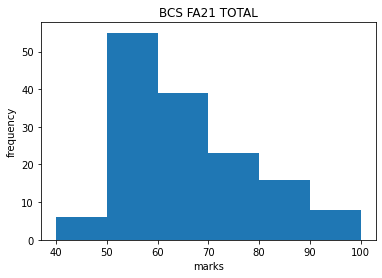

In [92]:
plt.hist(all_classes['TOTAL'], bins=bins)
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title("BCS FA21 TOTAL")
plt.xticks(bins)
plt.show()

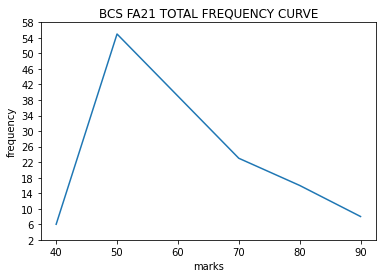

In [93]:

plt.plot(bins[:-1], all_classes['TOTAL'].value_counts(bins=bins - 1).sort_index())
plt.xlabel('marks')
plt.ylabel('frequency')
plt.title('BCS FA21 TOTAL FREQUENCY CURVE')
plt.xticks(bins[:-1])
plt.yticks(np.arange(2, 60, 4))
plt.show()

array([[<AxesSubplot:title={'center':'QUIZ'}>,
        <AxesSubplot:title={'center':'ASSIGN'}>],
       [<AxesSubplot:title={'center':'MID'}>,
        <AxesSubplot:title={'center':'FINAL'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>, <AxesSubplot:>]],
      dtype=object)

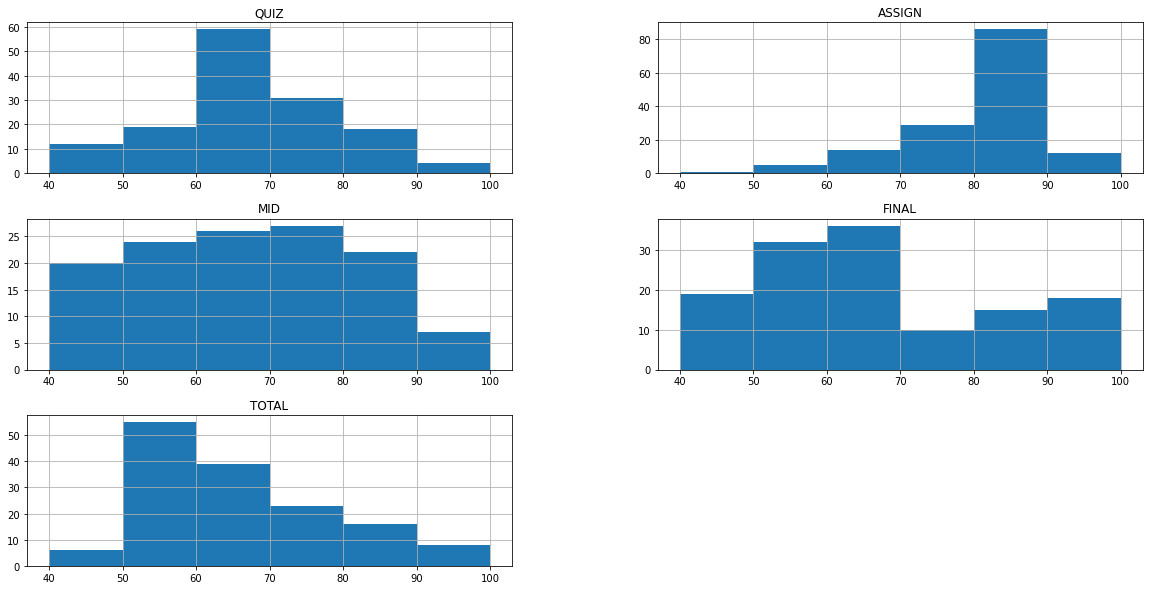

In [94]:
all_classes.hist(column=['QUIZ', 'ASSIGN', 'MID', 'FINAL', 'TOTAL'], figsize=(20, 10), bins=bins)

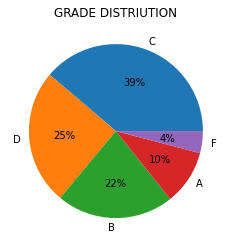

In [95]:
plt.pie(all_classes["LG"].str[0].value_counts(), labels=all_classes["LG"].str[0].value_counts().keys(), autopct='%.0f%%')
plt.title('GRADE DISTRIUTION')
plt.show()

<AxesSubplot:xlabel='classes'>

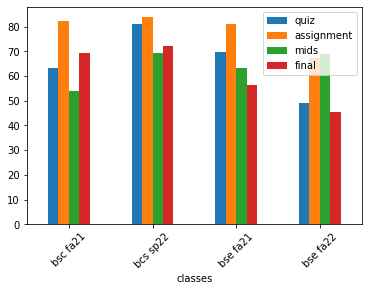

In [99]:
all_classes_average = pd.DataFrame({
  "classes": ["bsc fa21", "bcs sp22", "bse fa21", "bse fa22"],
  "quiz": [bcs_fa21["QUIZ"].mean(), bcs_sp22["QUIZ"].mean(), bse_fa21["QUIZ"].mean(), bse_fa22["QUIZ"].mean()],
  'assignment': [bcs_fa21["ASSIGN"].mean(), bcs_sp22["ASSIGN"].mean(), bse_fa21["ASSIGN"].mean(), bse_fa22["ASSIGN"].mean()],
  'mids': [bcs_fa21["MID"].mean(), bcs_sp22["MID"].mean(), bse_fa21["MID"].mean(), bse_fa22["MID"].mean()],
  'final': [bcs_fa21["FINAL"].mean(), bcs_sp22["FINAL"].mean(), bse_fa21["FINAL"].mean(), bse_fa22["FINAL"].mean()],
})
all_classes_average.plot(x='classes', y=['quiz', 'assignment', 'mids', 'final'], rot=45, kind='bar')